## Stock Movement Prediction using Transfer Learning and X-AI 

## Index
* [Generate/Update Datasets](#Generate/Update-Datasets)
* [Import Modules](#Import-Modules)
* [Helper Functions](#Helper-Functions)
* [Source Stock Preprocessing](#Source-Stock-Preprocessing)
    - [Loading Data](#Loading-Source-Data)
    - [Simple Moving Average (SMA)](#Simple-Moving-Average-SMA-Source)
    - [Exponential Moving Average (EMA)](#Exponential-Moving-Average-EMA-Source)
    - [Weighted Moving Average (WMA)](#Weighted-Moving-Average-WMA-Source)
    - [Momentum (MOM)](#Momentum-MOM-Source)
    - [Stochastic Oscillators](#Stochastic-Oscillators-Source)
        - [Stochastic %D](#Stochastic-D-Source)
        - [Stochastic %K](#Stochastic-K-Source)
    - [Moving Average Convergence Divergence (MACD)](#Moving-Average-Convergence-Divergence-MACD-Source)
    - [Commodity Channel Index (CCI)](#Commodity-Channel-Index-CCI-Source)
    - [Relative Strength Index (RSI)](#Relative-Strength-Index-RSI-Source)
    - [Variables](#Variables-Source)
* [Target Stock Preprocessing](#Target-Stock-Preprocessing)
    - [Loading Data](#Loading-Data-Target)
    - [Simple Moving Average (SMA)](#Simple-Moving-Average-SMA-Target)
    - [Exponential Moving Average (EMA)](#Exponential-Moving-Average-EMA-Target)
    - [Weighted Moving Average (WMA)](#Weighted-Moving-Average-WMA-Target)
    - [Momentum (MOM)](#Momentum-MOM-Target)
    - [Stochastic Oscillators](#Stochastic-Oscillators-Target)
        - [Stochastic %D](#Stochastic-D-Target)
        - [Stochastic %K](#Stochastic-K-Target)
    - [Moving Average Convergence Divergence (MACD)](#Moving-Average-Convergence-Divergence-MACD-Target)
    - [Commodity Channel Index (CCI)](#Commodity-Channel-Index-CCI-Target)
    - [Relative Strength Index (RSI)](#Relative-Strength-Index-RSI-Target)
    - [Variables](#Variables-Target)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [EDA Source](#EDA-Source)
        - [Plots](#Plots-Source)
        - [Correlation](#Correlation-Source)
        - [Feature Selection](#Feature-Selection-Source)
    - [EDA Target](#EDA-Target)
        - [Plots](#Plots-Target)
        - [Correlation](#Correlation-Target)
        - [Feature Selection](#Feature-Selection-Target)

### Generate/Update Datasets

In [1]:
#%run -i 'gen-data.py'

### Import Modules

In [2]:
import pandas as pd
import talib as tb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Use `%matplotlib qt` to open a navigable plot
%matplotlib inline

In [4]:
!python --version

Python 3.9.7


In [5]:
tb.__version__

'0.4.21'

### Helper Functions

In [6]:
"""
Takes a floating number,
and upon randomly getting
0 or 1 from randint(),
adds or subtracts a random
floatng point value between
0.0 and 1.0 to the argument.
"""
def get_value(value:float):
    random_variation = np.random.random()
    if np.random.randint(0, 2) == 0:
        return value+random_variation
    else:
        return value-random_variation

In [7]:
"""
Uses get_value(value:float) to fill
NaN values by iterating over a
pandas series.
"""
def fill_value(series:pd.core.series.Series, non_na_value):
    for index, row in series.iteritems():
        if np.isnan(row):
            series[index] = get_value(non_na_value)

In [8]:
"""
Returns the number of NaN values in a series.
"""
def count_na(series:pd.core.series.Series):
    return len(series) - np.count_nonzero(~np.isnan(series))

In [9]:
"""
Takes in a pandas series,
removes NaN values,
generates a dataframe
and returns it after
resetting the index.
"""
def get_clean_col(series:pd.core.series.Series):
    # Removing NaN values
    series.dropna(inplace=True)

    # Resetting index in series and generating a dataframe
    series = series.reset_index()

    # Removing the generated column 'index' from the dataframe
    series.drop(columns='index', inplace=True)
    return series

### Source Stock Preprocessing

#### Loading Data Source

In [10]:
source_stock_data = pd.read_csv("./final-data/source_stocks.csv")

**Created empty dataframe to store processed series**

In [11]:
indicator_source_stock = pd.DataFrame()

In [12]:
source_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,122.070312,122.071877,122.070312,122.071877,84.892334,657536
1,2000-01-04,131.250000,131.837891,126.976562,131.686722,91.578827,7191808
2,2000-01-05,122.664062,126.953125,121.151955,121.151955,84.252632,21069440
3,2000-01-06,119.192581,119.531250,111.459763,111.459763,77.512390,10495616
4,2000-01-07,102.542969,102.542969,102.542969,102.542969,71.311401,971392


#### Simple Moving Average SMA Source

In [13]:
sma_source_stock = tb.SMA(source_stock_data['Adj Close'], timeperiod=30)

In [14]:
# 30-1 because n-1th index holds the first non-nan value
first_non_nan_value = sma_source_stock[30-1]
fill_value(sma_source_stock, first_non_nan_value)

{'whiskers': [<matplotlib.lines.Line2D at 0x1977ad3e7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1977ad3ee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1977ad3e3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1977ad595b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1977ad59940>],
 'means': []}

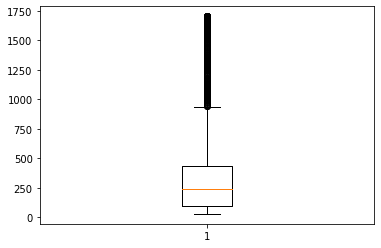

In [15]:
plt.boxplot(sma_source_stock)

In [16]:
sma_source_stock.head()

0    79.098439
1    78.968657
2    80.474581
3    78.931011
4    80.092360
dtype: float64

In [17]:
indicator_source_stock['SMA'] = sma_source_stock

#### Exponential Moving Average EMA Source

In [18]:
ema_source_stock = tb.EMA(source_stock_data['Adj Close'], timeperiod=30)

In [19]:
count_na(ema_source_stock)

29

In [20]:
first_non_nan_value = ema_source_stock[30-1]
fill_value(ema_source_stock, first_non_nan_value)

In [21]:
ema_source_stock.head()

0    80.021868
1    79.245398
2    80.414948
3    79.446197
4    78.803910
dtype: float64

In [22]:
indicator_source_stock.head()

,SMA
0,79.098439
1,78.968657
2,80.474581
3,78.931011
4,80.092360


In [23]:
indicator_source_stock['EMA'] = ema_source_stock

In [24]:
indicator_source_stock.head()

,SMA,EMA
0,79.098439,80.021868
1,78.968657,79.245398
2,80.474581,80.414948
3,78.931011,79.446197
4,80.092360,78.803910


#### Weighted Moving Average WMA Source

In [25]:
wma_source_stock = tb.WMA(source_stock_data['Adj Close'], 30)

In [26]:
count_na(wma_source_stock)

29

In [27]:
first_non_nan_value = wma_source_stock[30-1]
fill_value(wma_source_stock, first_non_nan_value)

In [28]:
wma_source_stock.head()

0    83.218474
1    82.574394
2    83.650529
3    82.420944
4    82.457010
dtype: float64

In [29]:
indicator_source_stock['WMA'] = wma_source_stock

#### Momentum MOM Source

In [30]:
mom_source_stock = tb.MOM(source_stock_data['Adj Close'], timeperiod=10)

In [31]:
count_na(mom_source_stock)

10

In [32]:
# MOM values cannot be replaced with random values. Please undo this.
first_non_nan_value = mom_source_stock[10]
fill_value(mom_source_stock, first_non_nan_value)

In [33]:
mom_source_stock.head()

0   -20.411990
1   -19.755478
2   -21.037183
3   -20.543728
4   -20.965179
dtype: float64

In [34]:
indicator_source_stock['MOM'] = mom_source_stock
indicator_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA     5454 non-null   float64
 1   EMA     5454 non-null   float64
 2   WMA     5454 non-null   float64
 3   MOM     5454 non-null   float64
dtypes: float64(4)
memory usage: 170.6 KB


#### Stochastic Oscillators Source
* They measure where the closing price is in relation to the recent trading range.
* Values range from 0 to 100 %
* %d values over 75 % indicate an overbought condition
* %d values under 25 % indicate an oversold condition.
* When the Fast %d crosses above the Slow %d, it is a buy signal;
* When the Fast %d crosses below the Slow %d, it is a sell signal.
* The Raw %K is generally considered too erratic to use for crossover signals.

*I have condsidered the raw %K value, i.e. stck_source_stock. (May be useful)*

In [35]:
ohlc_source_stock = pd.read_csv('./final-data/source_stocks.csv')

In [36]:
ohlc_source_stock.High.head()

0    122.071877
1    131.837891
2    126.953125
3    119.531250
4    102.542969
Name: High, dtype: float64

In [37]:
# I have selected fastk_period and slowd_period as 15 because they resulted in 30 NaN values (indices 0 to 29),
# ...which made it easier to integrate with indicator_source_stock
stck_source_stock, stcd_source_stock = tb.STOCH(ohlc_source_stock.High, ohlc_source_stock.Low, ohlc_source_stock.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

##### Stochastic D Source

In [38]:
count_na(stcd_source_stock)

8

In [39]:
stcd_source_stock = get_clean_col(stcd_source_stock)
stcd_source_stock.head()

,0
0,22.171826
1,25.990460
2,24.419481
3,27.541423
4,34.564812


In [40]:
indicator_source_stock['STOCH_D'] = stcd_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D
0,79.098439,80.021868,83.218474,-20.411990,22.171826
1,78.968657,79.245398,82.574394,-19.755478,25.990460
2,80.474581,80.414948,83.650529,-21.037183,24.419481
3,78.931011,79.446197,82.420944,-20.543728,27.541423
4,80.092360,78.803910,82.457010,-20.965179,34.564812


##### Stochastic K Source

In [41]:
count_na(stck_source_stock)

8

In [42]:
stck_source_stock = get_clean_col(stck_source_stock)
stck_source_stock.head()

,0
0,21.502604
1,27.776950
2,23.978890
3,30.868430
4,48.847117


In [43]:
indicator_source_stock['STOCH_K'] = stck_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117


#### Moving Average Convergence Divergence MACD Source
* Consists of a short-term moving average, a long-term moving average and a signal line.
* The short-term moving average is calculated over a shorter duration of time (usually days 14 days (fastperiod)).
* The long-term moving average is calculated over a longer duration of time (typicallly 26 days (slowperiod)).
* The Exponential Moving Average (EMA) is calculated in both cases.
* When the short-term EMA rises above the long-term EMA in a chart, it means that there is a short-term
* demand for a particular stock, thus causing a rise in its value. This is typically a signal to trraders
* to buy more of the stock.
* On the other hand, when the short-term EMA falls below the long-term EMA on the chart, it means that the
* stock is losing its value and it is a good time to sell the stock before its price falls further.
* The signal line is the EMA calculated using the time-period as 9 days.
* MACD is also a lagging indicator.

In [44]:
# Default values are fastperiod=14, slowperiod=26 and signalperiod=9
macd_source_stock, macd_signal_source_stock, macd_hist_source_stock = tb.MACD(ohlc_source_stock.Close, fastperiod=14, slowperiod=26, signalperiod=9)


**Preprocessing MACD values (also called the short-term EMA)**

In [45]:
count_na(macd_source_stock)

33

In [46]:
macd_source_stock = get_clean_col(macd_source_stock)

In [47]:
indicator_source_stock['MACD'] = macd_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604,11.439567
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950,11.351049
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890,11.529158
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430,11.165022
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117,10.192959


**Preprocessing MACD historical values (also called the long-term EMA)**

In [48]:
count_na(macd_hist_source_stock)

33

In [49]:
macd_hist_source_stock = get_clean_col(macd_hist_source_stock)

In [50]:
    indicator_source_stock['MACD_HIST'] = macd_hist_source_stock
    indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604,11.439567,3.649675
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950,11.351049,2.848926
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890,11.529158,2.421628
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430,11.165022,1.645993
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117,10.192959,0.539145


**Preprocessing the signal line in MACD**

In [51]:
count_na(macd_signal_source_stock)

33

In [52]:
macd_signal_source_stock = get_clean_col(macd_signal_source_stock)

In [53]:
indicator_source_stock['MACD_SIG'] = macd_signal_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604,11.439567,3.649675,7.789891
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950,11.351049,2.848926,8.502123
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890,11.529158,2.421628,9.107530
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430,11.165022,1.645993,9.519028
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117,10.192959,0.539145,9.653814


#### Commodity Channel Index CCI Source

In [54]:
# default timeperiod=14
cci_source_stock = tb.CCI(ohlc_source_stock.High, ohlc_source_stock.Low, ohlc_source_stock.Close, timeperiod=14)

In [55]:
count_na(cci_source_stock)

13

In [56]:
cci_source_stock = get_clean_col(cci_source_stock)

In [57]:
indicator_source_stock['CCI'] = cci_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604,11.439567,3.649675,7.789891,-27.982698
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950,11.351049,2.848926,8.502123,-9.487801
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890,11.529158,2.421628,9.107530,76.998107
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430,11.165022,1.645993,9.519028,102.042166
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117,10.192959,0.539145,9.653814,134.457840


#### Relative Strength Index RSI Source

In [58]:
# default timperiod=14
rsi_source_stock = tb.RSI(ohlc_source_stock.Close, timeperiod=14)

In [59]:
count_na(rsi_source_stock)

14

In [60]:
rsi_source_stock = get_clean_col(rsi_source_stock)

In [61]:
indicator_source_stock['RSI'] = rsi_source_stock
indicator_source_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI,RSI
0,79.098439,80.021868,83.218474,-20.411990,22.171826,21.502604,11.439567,3.649675,7.789891,-27.982698,39.324516
1,78.968657,79.245398,82.574394,-19.755478,25.990460,27.776950,11.351049,2.848926,8.502123,-9.487801,42.093708
2,80.474581,80.414948,83.650529,-21.037183,24.419481,23.978890,11.529158,2.421628,9.107530,76.998107,43.490315
3,78.931011,79.446197,82.420944,-20.543728,27.541423,30.868430,11.165022,1.645993,9.519028,102.042166,43.490315
4,80.092360,78.803910,82.457010,-20.965179,34.564812,48.847117,10.192959,0.539145,9.653814,134.457840,47.749998


In [62]:
indicator_source_stock.tail()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI,RSI
5449,1701.877934,1701.595297,1707.073250,-76.356812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5450,1702.707170,1701.356892,1706.816610,-108.243286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5451,1702.678699,1701.430641,1706.803244,-84.017212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5452,1702.908101,1701.899629,1707.191712,-29.545044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5453,1703.250016,1704.196427,1709.423448,32.807617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
indicator_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMA        5454 non-null   float64
 1   EMA        5454 non-null   float64
 2   WMA        5454 non-null   float64
 3   MOM        5454 non-null   float64
 4   STOCH_D    5446 non-null   float64
 5   STOCH_K    5446 non-null   float64
 6   MACD       5421 non-null   float64
 7   MACD_HIST  5421 non-null   float64
 8   MACD_SIG   5421 non-null   float64
 9   CCI        5441 non-null   float64
 10  RSI        5440 non-null   float64
dtypes: float64(11)
memory usage: 468.8 KB


**Separating Indicators into Individual DataFrames**

In [64]:
ma_indicators_source_stock = pd.DataFrame()
ma_indicators_source_stock['SMA'] = sma_source_stock
ma_indicators_source_stock['EMA'] = ema_source_stock
ma_indicators_source_stock['WMA'] = wma_source_stock
ma_indicators_source_stock['MOM'] = mom_source_stock
ma_indicators_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA     5454 non-null   float64
 1   EMA     5454 non-null   float64
 2   WMA     5454 non-null   float64
 3   MOM     5454 non-null   float64
dtypes: float64(4)
memory usage: 170.6 KB


In [65]:
stoch_indicators_source_stock = pd.DataFrame()
stoch_indicators_source_stock['STOCH_K'] = stck_source_stock
stoch_indicators_source_stock['STOCH_D'] = stcd_source_stock
stoch_indicators_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5446 entries, 0 to 5445
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STOCH_K  5446 non-null   float64
 1   STOCH_D  5446 non-null   float64
dtypes: float64(2)
memory usage: 85.2 KB


In [66]:
macd_indicators_source_stock = pd.DataFrame()
macd_indicators_source_stock['MACD'] = macd_source_stock
macd_indicators_source_stock['MACD_HIST'] = macd_hist_source_stock
macd_indicators_source_stock['MACD_SIG'] = macd_signal_source_stock
macd_indicators_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5421 entries, 0 to 5420
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MACD       5421 non-null   float64
 1   MACD_HIST  5421 non-null   float64
 2   MACD_SIG   5421 non-null   float64
dtypes: float64(3)
memory usage: 127.2 KB


In [67]:
remaining_indicators_source_stock = pd.DataFrame()
remaining_indicators_source_stock['CCI'] = cci_source_stock
remaining_indicators_source_stock['RSI'] = rsi_source_stock

# Because RSI contains more NaN values than CCI
remaining_indicators_source_stock = remaining_indicators_source_stock.dropna()
remaining_indicators_source_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5440 entries, 0 to 5439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCI     5440 non-null   float64
 1   RSI     5440 non-null   float64
dtypes: float64(2)
memory usage: 127.5 KB


### Variables Source

In [68]:
whos

Variable                            Type         Data/Info
----------------------------------------------------------
cci_source_stock                    DataFrame                   0\n0     -<...>\n[5441 rows x 1 columns]
count_na                            function     <function count_na at 0x000001977ACA7430>
ema_source_stock                    Series       0         80.021868\n1   <...>gth: 5454, dtype: float64
fill_value                          function     <function fill_value at 0x000001977ACA74C0>
first_non_nan_value                 float64      -20.39722442626953
get_clean_col                       function     <function get_clean_col at 0x000001977ACA7550>
get_value                           function     <function get_value at 0x000001977ACA7280>
indicator_source_stock              DataFrame                  SMA        <...>n[5454 rows x 11 columns]
ma_indicators_source_stock          DataFrame                  SMA        <...>\n[5454 rows x 4 columns]
macd_hist_source_stock

### Target Stock Preprocessing

### Loading Data Target

In [69]:
target_stock_data = pd.read_csv("./final-data/target_stocks.csv")

**Created empty dataframe to store processed series**

In [70]:
indicator_target_stock = pd.DataFrame()

In [71]:
target_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,254.100006,266.700012,246.250000,252.399994,243.683426,14008351
1,2018-01-30,250.699997,261.000000,234.399994,252.949997,244.214432,2036442
2,2018-01-31,252.000000,258.000000,244.550003,249.550003,240.931839,658605
3,2018-02-01,245.000000,261.000000,242.500000,252.949997,244.214432,784681
4,2018-02-02,246.149994,251.800003,231.649994,233.899994,225.822311,483743


#### Simple Moving Average SMA Target

In [72]:
sma_target_stock = tb.SMA(target_stock_data['Adj Close'], timeperiod=30)

In [73]:
len(sma_target_stock)

929

In [74]:
# 30-1 because n-1th index holds the first non-nan value
first_non_nan_value = sma_target_stock[30-1]
fill_value(sma_target_stock, first_non_nan_value)

{'whiskers': [<matplotlib.lines.Line2D at 0x1977cf77bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1977cf841f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1977cf77820>],
 'medians': [<matplotlib.lines.Line2D at 0x1977cf84910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1977cf84ca0>],
 'means': []}

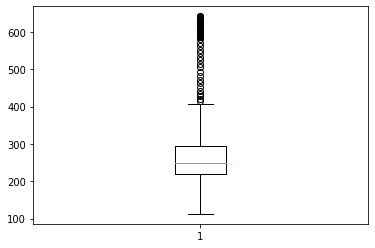

In [75]:
plt.boxplot(sma_target_stock)

In [76]:
sma_target_stock.head()

0    232.396681
1    230.553560
2    230.790634
3    231.540040
4    231.649287
dtype: float64

In [77]:
indicator_target_stock['SMA'] = sma_target_stock

#### Exponential Moving Average EMA Target

In [78]:
ema_target_stock = tb.EMA(target_stock_data['Adj Close'], timeperiod=30)

In [79]:
count_na(ema_target_stock)

29

In [80]:
first_non_nan_value = ema_target_stock[30-1]
fill_value(ema_target_stock, first_non_nan_value)

In [81]:
ema_target_stock.head()

0    230.617054
1    231.982571
2    231.533545
3    232.061712
4    230.648235
dtype: float64

In [82]:
indicator_target_stock['EMA'] = ema_target_stock

In [83]:
indicator_target_stock.head()

,SMA,EMA
0,232.396681,230.617054
1,230.553560,231.982571
2,230.790634,231.533545
3,231.540040,232.061712
4,231.649287,230.648235


#### Weighted Moving Average WMA Target

In [84]:
wma_target_stock = tb.WMA(target_stock_data['Adj Close'], 30)

In [85]:
count_na(wma_target_stock)

29

In [86]:
first_non_nan_value = wma_target_stock[30-1]
fill_value(wma_target_stock, first_non_nan_value)

In [87]:
wma_target_stock.head()

0    231.540589
1    229.983787
2    230.582464
3    230.667641
4    229.946818
dtype: float64

In [88]:
indicator_target_stock['WMA'] = wma_target_stock

#### Momentum MOM Target

In [89]:
mom_target_stock = tb.MOM(target_stock_data['Adj Close'], timeperiod=10)

In [90]:
count_na(mom_target_stock)

10

In [91]:
    # MOM values cannot be replaced with random values. Please undo this.
    first_non_nan_value = mom_target_stock[10]
    fill_value(mom_target_stock, first_non_nan_value)

In [92]:
mom_target_stock.head()

0   -4.478615
1   -3.227281
2   -3.282542
3   -4.330503
4   -3.696419
dtype: float64

In [93]:
indicator_target_stock['MOM'] = mom_target_stock
indicator_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA     929 non-null    float64
 1   EMA     929 non-null    float64
 2   WMA     929 non-null    float64
 3   MOM     929 non-null    float64
dtypes: float64(4)
memory usage: 29.2 KB


#### Stochastic Oscillators Target
* They measure where the closing price is in relation to the recent trading range.
* Values range from 0 to 100 %
* %d values over 75 % indicate an overbought condition
* %d values under 25 % indicate an oversold condition.
* When the Fast %d crosses above the Slow %d, it is a buy signal;
* When the Fast %d crosses below the Slow %d, it is a sell signal.
* The Raw %K is generally considered too erratic to use for crossover signals.

*I have condsidered the raw %K value, i.e. stck_target_stock. (May be useful)*

In [94]:
ohlc_target_stock = pd.read_csv('./final-data/target_stocks.csv')

In [95]:
ohlc_target_stock.High.head()

0    266.700012
1    261.000000
2    258.000000
3    261.000000
4    251.800003
Name: High, dtype: float64

In [96]:
# I have selected fastk_period and slowd_period as 15 because they resulted in 30 NaN values (indices 0 to 29),
# ...which made it easier to integrate with indicator_target_stock
stck_target_stock, stcd_target_stock = tb.STOCH(ohlc_target_stock.High, ohlc_target_stock.Low, ohlc_target_stock.Close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

##### Stochastic D Target

In [97]:
count_na(stcd_target_stock)

8

In [98]:
stcd_target_stock = get_clean_col(stcd_target_stock)
stcd_target_stock.head()

,0
0,30.487937
1,43.952639
2,59.380118
3,73.628732
4,78.054149


In [99]:
indicator_target_stock['STOCH_D'] = stcd_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D
0,232.396681,230.617054,231.540589,-4.478615,30.487937
1,230.553560,231.982571,229.983787,-3.227281,43.952639
2,230.790634,231.533545,230.582464,-3.282542,59.380118
3,231.540040,232.061712,230.667641,-4.330503,73.628732
4,231.649287,230.648235,229.946818,-3.696419,78.054149


##### Stochastic K Target

In [100]:
count_na(stck_target_stock)

8

In [101]:
stck_target_stock = get_clean_col(stck_target_stock)
stck_target_stock.head()

,0
0,42.409420
1,59.360765
2,76.370169
3,85.155262
4,72.637015


In [102]:
indicator_target_stock['STOCH_K'] = stck_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015


#### Moving Average Convergence Divergence MACD Target
* Consists of a short-term moving average, a long-term moving average and a signal line.
* The short-term moving average is calculated over a shorter duration of time (usually days 14 days (fastperiod)).
* The long-term moving average is calculated over a longer duration of time (typicallly 26 days (slowperiod)).
* The Exponential Moving Average (EMA) is calculated in both cases.
* When the short-term EMA rises above the long-term EMA in a chart, it means that there is a short-term
* demand for a particular stock, thus causing a rise in its value. This is typically a signal to trraders
* to buy more of the stock.
* On the other hand, when the short-term EMA falls below the long-term EMA on the chart, it means that the
* stock is losing its value and it is a good time to sell the stock before its price falls further.
* The signal line is the EMA calculated using the time-period as 9 days.
* MACD is also a lagging indicator.

In [103]:
# Default values are fastperiod=14, slowperiod=26 and signalperiod=9
macd_target_stock, macd_signal_target_stock, macd_hist_target_stock = tb.MACD(ohlc_target_stock.Close, fastperiod=14, slowperiod=26, signalperiod=9)

**Preprocessing MACD values (also called the short-term EMA)**

In [104]:
count_na(macd_target_stock)

33

In [105]:
macd_target_stock = get_clean_col(macd_target_stock)

In [106]:
indicator_target_stock['MACD'] = macd_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420,-1.003501
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765,-1.422598
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169,-1.715231
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262,-2.016081
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015,-2.477593


**Preprocessing MACD historical values (also called the long-term EMA)**

In [107]:
count_na(macd_hist_target_stock)

33

In [108]:
macd_hist_target_stock = get_clean_col(macd_hist_target_stock)

In [109]:
indicator_target_stock['MACD_HIST'] = macd_hist_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420,-1.003501,0.342910
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765,-1.422598,-0.060949
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169,-1.715231,-0.282866
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262,-2.016081,-0.466973
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015,-2.477593,-0.742788


**Preprocessing the signal line in MACD**

In [110]:
count_na(macd_signal_target_stock)

33

In [111]:
macd_signal_target_stock = get_clean_col(macd_signal_target_stock)

In [112]:
indicator_target_stock['MACD_SIG'] = macd_signal_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420,-1.003501,0.342910,-1.346412
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765,-1.422598,-0.060949,-1.361649
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169,-1.715231,-0.282866,-1.432365
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262,-2.016081,-0.466973,-1.549109
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015,-2.477593,-0.742788,-1.734805


#### Commodity Channel Index CCI Target

In [113]:
# default timeperiod=14
cci_target_stock = tb.CCI(ohlc_target_stock.High, ohlc_target_stock.Low, ohlc_target_stock.Close, timeperiod=14)

In [114]:
count_na(cci_target_stock)

13

In [115]:
cci_target_stock = get_clean_col(cci_target_stock)

In [116]:
indicator_target_stock['CCI'] = cci_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420,-1.003501,0.342910,-1.346412,-42.420523
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765,-1.422598,-0.060949,-1.361649,-75.208495
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169,-1.715231,-0.282866,-1.432365,-76.327298
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262,-2.016081,-0.466973,-1.549109,-72.606628
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015,-2.477593,-0.742788,-1.734805,-17.470786


#### Relative Strength Index RSI Target

In [117]:
# default timperiod=14
rsi_target_stock = tb.RSI(ohlc_target_stock.Close, timeperiod=14)

In [118]:
count_na(rsi_target_stock)

14

In [119]:
rsi_target_stock = get_clean_col(rsi_target_stock)

In [120]:
indicator_target_stock['RSI'] = rsi_target_stock
indicator_target_stock.head()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI,RSI
0,232.396681,230.617054,231.540589,-4.478615,30.487937,42.409420,-1.003501,0.342910,-1.346412,-42.420523,35.714284
1,230.553560,231.982571,229.983787,-3.227281,43.952639,59.360765,-1.422598,-0.060949,-1.361649,-75.208495,35.888853
2,230.790634,231.533545,230.582464,-3.282542,59.380118,76.370169,-1.715231,-0.282866,-1.432365,-76.327298,36.075792
3,231.540040,232.061712,230.667641,-4.330503,73.628732,85.155262,-2.016081,-0.466973,-1.549109,-72.606628,41.871323
4,231.649287,230.648235,229.946818,-3.696419,78.054149,72.637015,-2.477593,-0.742788,-1.734805,-17.470786,40.291556


In [121]:
indicator_target_stock.tail()

,SMA,EMA,WMA,MOM,STOCH_D,STOCH_K,MACD,MACD_HIST,MACD_SIG,CCI,RSI
924,590.238334,589.687740,589.709786,-36.649963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,590.000000,588.824014,588.810538,-54.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,589.401666,587.728915,587.639569,-31.650024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,588.831667,587.359308,587.162042,-6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,587.898334,586.236127,585.943871,-19.649963,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
indicator_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMA        929 non-null    float64
 1   EMA        929 non-null    float64
 2   WMA        929 non-null    float64
 3   MOM        929 non-null    float64
 4   STOCH_D    921 non-null    float64
 5   STOCH_K    921 non-null    float64
 6   MACD       896 non-null    float64
 7   MACD_HIST  896 non-null    float64
 8   MACD_SIG   896 non-null    float64
 9   CCI        916 non-null    float64
 10  RSI        915 non-null    float64
dtypes: float64(11)
memory usage: 80.0 KB


**Separating Indicators into Individual DataFrames**

In [123]:
ma_indicators_target_stock = pd.DataFrame()
ma_indicators_target_stock['SMA'] = sma_target_stock
ma_indicators_target_stock['EMA'] = ema_target_stock
ma_indicators_target_stock['WMA'] = wma_target_stock
ma_indicators_target_stock['MOM'] = mom_target_stock
ma_indicators_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA     929 non-null    float64
 1   EMA     929 non-null    float64
 2   WMA     929 non-null    float64
 3   MOM     929 non-null    float64
dtypes: float64(4)
memory usage: 29.2 KB


In [124]:
stoch_indicators_target_stock = pd.DataFrame()
stoch_indicators_target_stock['STOCH_K'] = stck_target_stock
stoch_indicators_target_stock['STOCH_D'] = stcd_target_stock
stoch_indicators_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STOCH_K  921 non-null    float64
 1   STOCH_D  921 non-null    float64
dtypes: float64(2)
memory usage: 14.5 KB


In [125]:
macd_indicators_target_stock = pd.DataFrame()
macd_indicators_target_stock['MACD'] = macd_target_stock
macd_indicators_target_stock['MACD_HIST'] = macd_hist_target_stock
macd_indicators_target_stock['MACD_SIG'] = macd_signal_target_stock
macd_indicators_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MACD       896 non-null    float64
 1   MACD_HIST  896 non-null    float64
 2   MACD_SIG   896 non-null    float64
dtypes: float64(3)
memory usage: 21.1 KB


In [126]:
remaining_indicators_target_stock = pd.DataFrame()
remaining_indicators_target_stock['CCI'] = cci_target_stock
remaining_indicators_target_stock['RSI'] = rsi_target_stock

# Because RSI contains more NaN values than CCI
remaining_indicators_target_stock = remaining_indicators_target_stock.dropna()
remaining_indicators_target_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 914
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CCI     915 non-null    float64
 1   RSI     915 non-null    float64
dtypes: float64(2)
memory usage: 21.4 KB


### Variables Target

In [127]:
whos

Variable                            Type         Data/Info
----------------------------------------------------------
cci_source_stock                    DataFrame                   0\n0     -<...>\n[5441 rows x 1 columns]
cci_target_stock                    DataFrame                 0\n0   -42.4<...>n\n[916 rows x 1 columns]
count_na                            function     <function count_na at 0x000001977ACA7430>
ema_source_stock                    Series       0         80.021868\n1   <...>gth: 5454, dtype: float64
ema_target_stock                    Series       0      230.617054\n1     <...>ngth: 929, dtype: float64
fill_value                          function     <function fill_value at 0x000001977ACA74C0>
first_non_nan_value                 float64      -3.6687774658203125
get_clean_col                       function     <function get_clean_col at 0x000001977ACA7550>
get_value                           function     <function get_value at 0x000001977ACA7280>
indicator_source_stoc

## Exploratory Data Analysis

### EDA Source

In [128]:
ohlcv_source_stock = pd.read_csv('./final-data/source_stocks.csv')
final_source_df = pd.DataFrame(ohlcv_source_stock)

In [129]:
final_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5454 non-null   object 
 1   Open       5454 non-null   float64
 2   High       5454 non-null   float64
 3   Low        5454 non-null   float64
 4   Close      5454 non-null   float64
 5   Adj Close  5454 non-null   float64
 6   Volume     5454 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 298.4+ KB


In [130]:
final_source_df = final_source_df.assign(MACD_HIST=macd_hist_source_stock)

In [131]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN


In [132]:
final_source_df = final_source_df.assign(MACD=macd_source_stock)

In [133]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN


In [134]:
final_source_df = final_source_df.assign(MACD_SIG=macd_signal_source_stock)

In [135]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN


In [136]:
final_source_df = final_source_df.assign(SMA=sma_source_stock)

In [137]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016


In [138]:
final_source_df = final_source_df.assign(WMA=wma_source_stock)

In [139]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448


In [140]:
final_source_df = final_source_df.assign(EMA=ema_source_stock)

In [141]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427


In [142]:
final_source_df = final_source_df.assign(STOCH_D=stcd_source_stock)

In [143]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427,NaN


In [144]:
final_source_df = final_source_df.assign(STOCH_K=stck_source_stock)

In [145]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297,NaN,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892,NaN,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641,NaN,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629,NaN,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427,NaN,NaN


In [146]:
final_source_df = final_source_df.assign(MOM=mom_source_stock)

In [147]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297,NaN,NaN,-76.356812
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892,NaN,NaN,-108.243286
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641,NaN,NaN,-84.017212
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629,NaN,NaN,-29.545044
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427,NaN,NaN,32.807617


In [148]:
final_source_df = final_source_df.assign(RSI=rsi_source_stock)

In [149]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297,NaN,NaN,-76.356812,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892,NaN,NaN,-108.243286,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641,NaN,NaN,-84.017212,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629,NaN,NaN,-29.545044,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427,NaN,NaN,32.807617,NaN


In [150]:
final_source_df = final_source_df.assign(CCI=cci_source_stock)

In [151]:
final_source_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
0,2000-01-03,122.070312,122.071877,122.070312,122.071877,84.892334,657536,3.649675,11.439567,7.789891,79.098439,83.218474,80.021868,22.171826,21.502604,-20.411990,39.324516,-27.982698
1,2000-01-04,131.250000,131.837891,126.976562,131.686722,91.578827,7191808,2.848926,11.351049,8.502123,78.968657,82.574394,79.245398,25.990460,27.776950,-19.755478,42.093708,-9.487801
2,2000-01-05,122.664062,126.953125,121.151955,121.151955,84.252632,21069440,2.421628,11.529158,9.107530,80.474581,83.650529,80.414948,24.419481,23.978890,-21.037183,43.490315,76.998107
3,2000-01-06,119.192581,119.531250,111.459763,111.459763,77.512390,10495616,1.645993,11.165022,9.519028,78.931011,82.420944,79.446197,27.541423,30.868430,-20.543728,43.490315,102.042166
4,2000-01-07,102.542969,102.542969,102.542969,102.542969,71.311401,971392,0.539145,10.192959,9.653814,80.092360,82.457010,78.803910,34.564812,48.847117,-20.965179,47.749998,134.457840


In [152]:
final_source_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
5449,2021-11-01,1677.5,1707.199951,1676.000000,1700.050049,1700.050049,3636806,NaN,NaN,NaN,1701.877934,1707.073250,1701.595297,NaN,NaN,-76.356812,NaN,NaN
5450,2021-11-02,1695.0,1706.449951,1686.349976,1697.900024,1697.900024,3471772,NaN,NaN,NaN,1702.707170,1706.816610,1701.356892,NaN,NaN,-108.243286,NaN,NaN
5451,2021-11-03,1709.0,1717.449951,1699.000000,1702.500000,1702.500000,3530713,NaN,NaN,NaN,1702.678699,1706.803244,1701.430641,NaN,NaN,-84.017212,NaN,NaN
5452,2021-11-04,1715.0,1717.000000,1705.000000,1708.699951,1708.699951,483407,NaN,NaN,NaN,1702.908101,1707.191712,1701.899629,NaN,NaN,-29.545044,NaN,NaN
5453,2021-11-08,1730.0,1741.000000,1703.000000,1737.500000,1737.500000,5245903,NaN,NaN,NaN,1703.250016,1709.423448,1704.196427,NaN,NaN,32.807617,NaN,NaN


In [153]:
final_source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5454 non-null   object 
 1   Open       5454 non-null   float64
 2   High       5454 non-null   float64
 3   Low        5454 non-null   float64
 4   Close      5454 non-null   float64
 5   Adj Close  5454 non-null   float64
 6   Volume     5454 non-null   int64  
 7   MACD_HIST  5421 non-null   float64
 8   MACD       5421 non-null   float64
 9   MACD_SIG   5421 non-null   float64
 10  SMA        5454 non-null   float64
 11  WMA        5454 non-null   float64
 12  EMA        5454 non-null   float64
 13  STOCH_D    5446 non-null   float64
 14  STOCH_K    5446 non-null   float64
 15  MOM        5454 non-null   float64
 16  RSI        5440 non-null   float64
 17  CCI        5441 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 767.1+ KB


**Removing NaN values**

In [154]:
final_source_df.dropna(axis=0, inplace=True)

In [155]:
final_source_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 5420
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5421 non-null   object 
 1   Open       5421 non-null   float64
 2   High       5421 non-null   float64
 3   Low        5421 non-null   float64
 4   Close      5421 non-null   float64
 5   Adj Close  5421 non-null   float64
 6   Volume     5421 non-null   int64  
 7   MACD_HIST  5421 non-null   float64
 8   MACD       5421 non-null   float64
 9   MACD_SIG   5421 non-null   float64
 10  SMA        5421 non-null   float64
 11  WMA        5421 non-null   float64
 12  EMA        5421 non-null   float64
 13  STOCH_D    5421 non-null   float64
 14  STOCH_K    5421 non-null   float64
 15  MOM        5421 non-null   float64
 16  RSI        5421 non-null   float64
 17  CCI        5421 non-null   float64
dtypes: float64(16), int64(1), object(1)
memory usage: 804.7+ KB


In [156]:
final_source_df.describe()

,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
count,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5.421000e+03,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000,5421.000000
mean,369.229521,373.598882,364.763134,369.178159,318.590470,1.644927e+07,-0.003159,1.767928,1.771087,314.297044,315.759453,314.337026,52.778376,52.777571,2.929692,52.792518,17.176180
std,304.584460,307.458829,301.857699,304.685673,302.079461,1.667991e+07,2.116157,7.592811,7.216084,293.424247,296.285221,293.394217,22.322907,24.263463,22.617404,11.742714,107.679129
min,33.984375,36.356251,33.049217,34.177341,23.833971,0.000000e+00,-18.732141,-47.914806,-37.823881,28.757317,27.883315,29.921759,2.991561,0.067235,-204.071106,14.869483,-398.869300
25%,138.250000,140.250000,135.971878,138.403122,100.090538,6.584982e+06,-0.755744,-1.585880,-1.423926,97.873082,98.995202,97.850826,34.471848,32.817298,-4.682587,44.813887,-65.310726
50%,302.612488,306.125000,298.781250,302.668762,240.496674,1.013176e+07,0.061592,1.119863,1.077390,242.315672,241.971238,243.375081,53.999780,54.302055,1.701508,52.896274,28.216893
75%,507.500000,513.200012,501.000000,506.274994,441.148621,1.961786e+07,0.871921,4.440229,4.262138,432.144803,435.296810,432.832578,71.419381,73.759211,9.210129,61.257798,98.290211
max,1750.000000,1757.000000,1732.000000,1741.650024,1726.350464,2.766150e+08,13.256924,48.544693,45.088464,1687.676497,1689.692396,1669.687717,98.654113,100.000000,174.249878,84.382655,446.203977


#### Plots Source

In [157]:
# %matplotlib qt
%matplotlib inline

In [224]:
final_source_df

,Date,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
0,2000-01-03,84.892334,657536,3.649675,11.439567,7.789891,80.021868,22.171826,21.502604,-20.411990,39.324516,-27.982698
1,2000-01-04,91.578827,7191808,2.848926,11.351049,8.502123,79.245398,25.990460,27.776950,-19.755478,42.093708,-9.487801
2,2000-01-05,84.252632,21069440,2.421628,11.529158,9.107530,80.414948,24.419481,23.978890,-21.037183,43.490315,76.998107
3,2000-01-06,77.512390,10495616,1.645993,11.165022,9.519028,79.446197,27.541423,30.868430,-20.543728,43.490315,102.042166
4,2000-01-07,71.311401,971392,0.539145,10.192959,9.653814,78.803910,34.564812,48.847117,-20.965179,47.749998,134.457840
...,...,...,...,...,...,...,...,...,...,...,...,...
5416,2021-09-14,1671.338013,4945167,-5.283581,1.116199,6.399780,1665.732960,72.490739,79.435462,-11.795410,46.046545,-122.275241
5417,2021-09-15,1696.415649,4062344,-5.118903,0.001152,5.120055,1667.712489,76.807497,69.906132,4.956055,49.472406,-88.703423
5418,2021-09-16,1687.296509,3246568,-4.592891,-0.621060,3.971832,1668.975974,63.567226,41.360084,24.284790,45.234441,-53.604408
5419,2021-09-17,1676.442749,7454864,-3.774927,-0.746827,3.028100,1669.457701,45.314556,24.677452,2.180786,49.460841,-53.157759


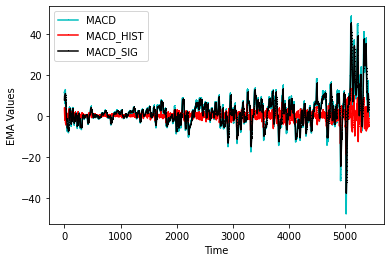

In [158]:
plt.plot(final_source_df['MACD'], ',-c')
plt.plot(final_source_df['MACD_HIST'], ',-r')
plt.plot(final_source_df['MACD_SIG'], ',-k')
plt.xlabel('Time')
plt.ylabel('EMA Values')
plt.legend(['MACD', 'MACD_HIST', 'MACD_SIG'])

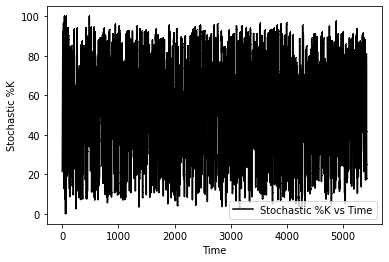

In [159]:
plt.plot(final_source_df['STOCH_K'], ',-k')
plt.xlabel('Time')
plt.ylabel('Stochastic %K')
plt.legend(['Stochastic %K vs Time'])

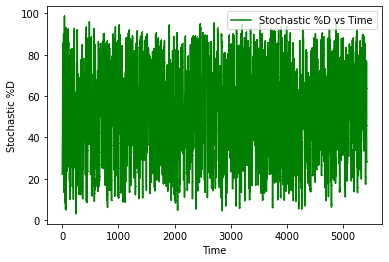

In [160]:
plt.plot(final_source_df['STOCH_D'], ',-g')
plt.xlabel('Time')
plt.ylabel('Stochastic %D')
plt.legend(['Stochastic %D vs Time'])

Text(0.5, 1.0, 'RSI vs Time')

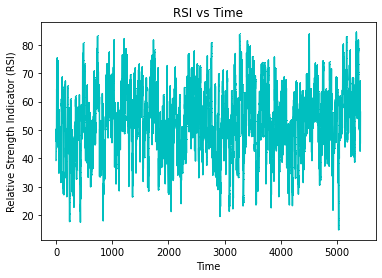

In [161]:
plt.plot(final_source_df['RSI'], ',-c')
plt.xlabel('Time')
plt.ylabel('Relative Strength Indicator (RSI)')
plt.title('RSI vs Time')

Text(0.5, 1.0, 'CCI vs Time')

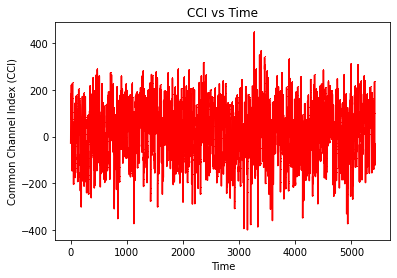

In [162]:
plt.plot(final_source_df['CCI'], ',-r')
plt.xlabel('Time')
plt.ylabel('Common Channel Index (CCI)')
plt.title('CCI vs Time')

Text(0.5, 1.0, 'Moving Average Envelope over T=30 days')

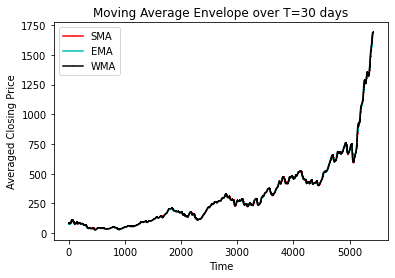

In [163]:
plt.plot(final_source_df['SMA'], ',-r')
plt.plot(final_source_df['EMA'], ',-c')
plt.plot(final_source_df['WMA'], ',-k')
plt.xlabel('Time')
plt.ylabel('Averaged Closing Price')
plt.legend(['SMA', 'EMA', 'WMA'])
plt.title('Moving Average Envelope over T=30 days')

Text(0.5, 1.0, 'Momentum vs Time')

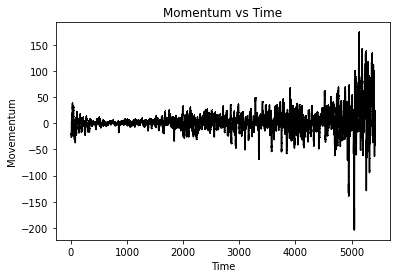

In [164]:
plt.plot(final_source_df['MOM'], ',-k')
plt.xlabel('Time')
plt.ylabel('Momentum')
plt.title('Momentum vs Time')

Text(0.5, 1.0, 'Price vs Time')

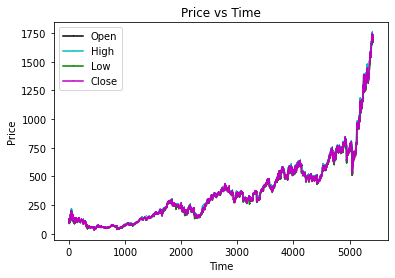

In [165]:
plt.plot(final_source_df['Open'], ',-k')
plt.plot(final_source_df['High'], ',-c')
plt.plot(final_source_df['Low'], ',-g')
plt.plot(final_source_df['Close'], ',-m')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.title('Price vs Time')

#### Correlation Source

In [166]:
# from sklearn import preprocessing

In [167]:
# min_max = preprocessing.MinMaxScaler()
# scaled_final_source_df = min_max.fit_transform(final_source_df.iloc[:, 1:3].to_numpy())

In [168]:
# scaled_final_source_df = pd.DataFrame(scaled_final_source_df, columns=final_source_df.iloc[:, 1:3].columns)

In [169]:
# scaled_final_source_df.head()

In [170]:
# %matplotlib qt
# sns.heatmap(scaled_final_source_df)

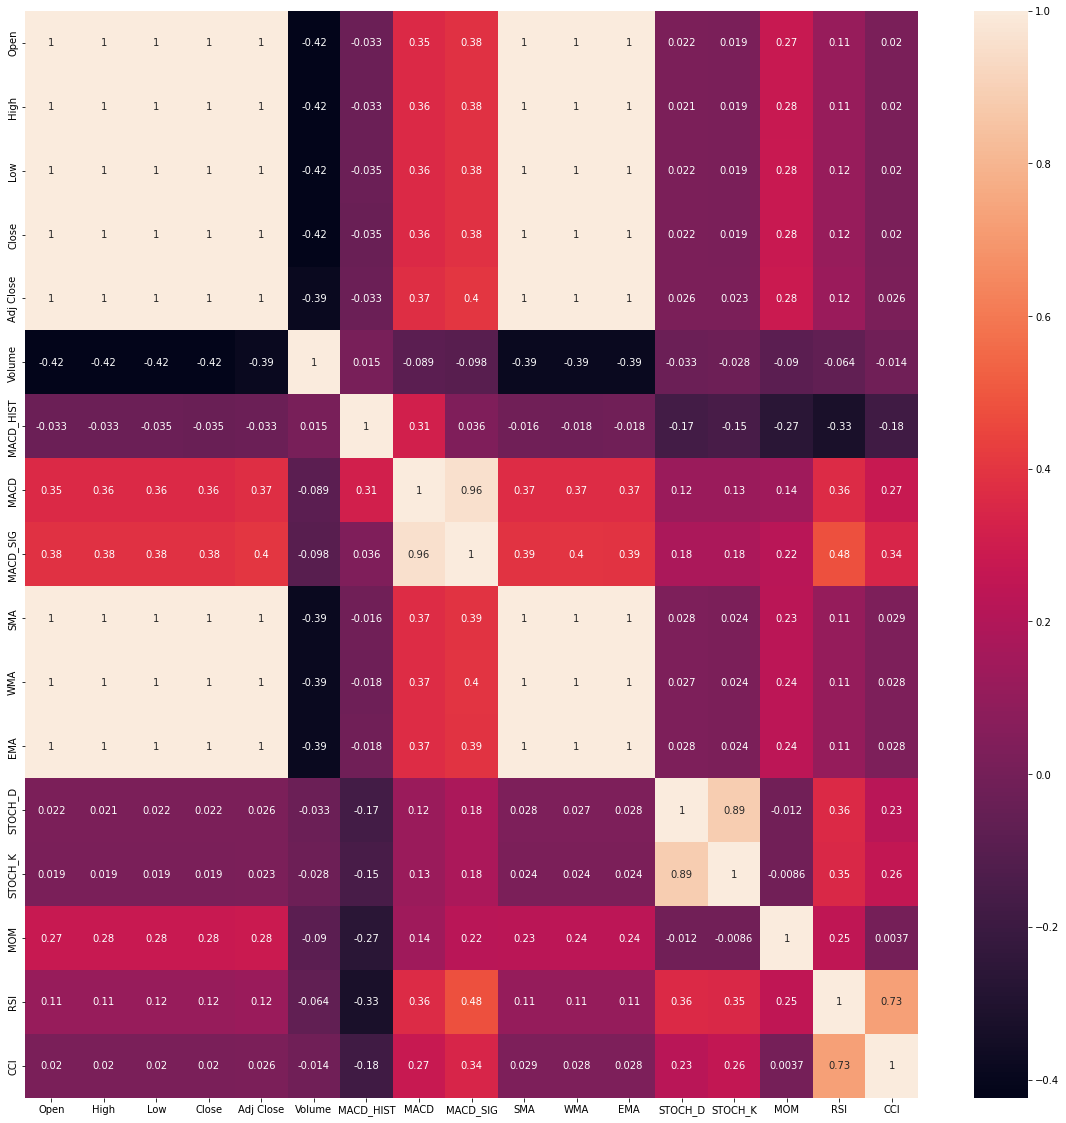

In [171]:
source_corr = final_source_df.corr()
top_source_corr_features = source_corr.index
plt.figure(figsize=(20,20))
source_heatmap = sns.heatmap(final_source_df[top_source_corr_features].corr(),annot=True)

#### Feature Selection Source

*Selecting:* Close, Volume, EMA, MACD_HIST, MACD_SIG, MACD, STOCH_D, STOCH_K, RSI and CCI  
*Removing:* Open, High, Low, SMA, WMA

In [172]:
final_source_df.drop(['Open', 'High', 'Low', 'SMA', 'WMA', 'Close'], axis=1, inplace=True)

In [173]:
final_source_df.to_csv('./final-data/features_source.csv')

### EDA Target

In [174]:
ohlcv_target_stock = pd.read_csv('./final-data/target_stocks.csv')
final_target_df = pd.DataFrame(ohlcv_target_stock)

In [175]:
final_target_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,254.100006,266.700012,246.250000,252.399994,243.683426,14008351
1,2018-01-30,250.699997,261.000000,234.399994,252.949997,244.214432,2036442
2,2018-01-31,252.000000,258.000000,244.550003,249.550003,240.931839,658605
3,2018-02-01,245.000000,261.000000,242.500000,252.949997,244.214432,784681
4,2018-02-02,246.149994,251.800003,231.649994,233.899994,225.822311,483743


In [176]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162


In [177]:
final_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       929 non-null    object 
 1   Open       929 non-null    float64
 2   High       929 non-null    float64
 3   Low        929 non-null    float64
 4   Close      929 non-null    float64
 5   Adj Close  929 non-null    float64
 6   Volume     929 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 50.9+ KB


In [178]:
final_target_df = final_target_df.assign(MACD_HIST=macd_hist_target_stock)

In [179]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN


In [180]:
final_target_df = final_target_df.assign(MACD=macd_target_stock)

In [181]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN


In [182]:
final_target_df = final_target_df.assign(MACD_SIG=macd_signal_target_stock)

In [183]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN


In [184]:
final_target_df = final_target_df.assign(SMA=sma_target_stock)

In [185]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334


In [186]:
final_target_df = final_target_df.assign(WMA=wma_target_stock)

In [187]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871


In [188]:
final_target_df = final_target_df.assign(EMA=ema_target_stock)

In [189]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127


In [190]:
final_target_df = final_target_df.assign(STOCH_D=stcd_target_stock)

In [191]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127,NaN


In [192]:
final_target_df = final_target_df.assign(STOCH_K=stck_target_stock)

In [193]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740,NaN,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014,NaN,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915,NaN,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308,NaN,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127,NaN,NaN


In [194]:
final_target_df = final_target_df.assign(MOM=mom_target_stock)

In [195]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740,NaN,NaN,-36.649963
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014,NaN,NaN,-54.250000
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915,NaN,NaN,-31.650024
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308,NaN,NaN,-6.250000
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127,NaN,NaN,-19.649963


In [196]:
final_target_df = final_target_df.assign(RSI=rsi_target_stock)

In [197]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740,NaN,NaN,-36.649963,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014,NaN,NaN,-54.250000,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915,NaN,NaN,-31.650024,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308,NaN,NaN,-6.250000,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127,NaN,NaN,-19.649963,NaN


In [198]:
final_target_df = final_target_df.assign(CCI=cci_target_stock)

In [199]:
final_target_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
0,2018-01-29,254.100006,266.700012,246.250000,252.399994,243.683426,14008351,0.342910,-1.003501,-1.346412,232.396681,231.540589,230.617054,30.487937,42.409420,-4.478615,35.714284,-42.420523
1,2018-01-30,250.699997,261.000000,234.399994,252.949997,244.214432,2036442,-0.060949,-1.422598,-1.361649,230.553560,229.983787,231.982571,43.952639,59.360765,-3.227281,35.888853,-75.208495
2,2018-01-31,252.000000,258.000000,244.550003,249.550003,240.931839,658605,-0.282866,-1.715231,-1.432365,230.790634,230.582464,231.533545,59.380118,76.370169,-3.282542,36.075792,-76.327298
3,2018-02-01,245.000000,261.000000,242.500000,252.949997,244.214432,784681,-0.466973,-2.016081,-1.549109,231.540040,230.667641,232.061712,73.628732,85.155262,-4.330503,41.871323,-72.606628
4,2018-02-02,246.149994,251.800003,231.649994,233.899994,225.822311,483743,-0.742788,-2.477593,-1.734805,231.649287,229.946818,230.648235,78.054149,72.637015,-3.696419,40.291556,-17.470786


In [200]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
924,2021-11-01,584.000000,585.000000,567.000000,579.650024,579.650024,104344,NaN,NaN,NaN,590.238334,589.709786,589.687740,NaN,NaN,-36.649963,NaN,NaN
925,2021-11-02,587.000000,590.750000,575.000000,576.299988,576.299988,34973,NaN,NaN,NaN,590.000000,588.810538,588.824014,NaN,NaN,-54.250000,NaN,NaN
926,2021-11-03,585.950012,585.950012,570.000000,571.849976,571.849976,33426,NaN,NaN,NaN,589.401666,587.639569,587.728915,NaN,NaN,-31.650024,NaN,NaN
927,2021-11-04,592.000000,592.000000,576.450012,582.000000,582.000000,19166,NaN,NaN,NaN,588.831667,587.162042,587.359308,NaN,NaN,-6.250000,NaN,NaN
928,2021-11-08,589.700012,589.700012,567.150024,569.950012,569.950012,103162,NaN,NaN,NaN,587.898334,585.943871,586.236127,NaN,NaN,-19.649963,NaN,NaN


In [201]:
final_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       929 non-null    object 
 1   Open       929 non-null    float64
 2   High       929 non-null    float64
 3   Low        929 non-null    float64
 4   Close      929 non-null    float64
 5   Adj Close  929 non-null    float64
 6   Volume     929 non-null    int64  
 7   MACD_HIST  896 non-null    float64
 8   MACD       896 non-null    float64
 9   MACD_SIG   896 non-null    float64
 10  SMA        929 non-null    float64
 11  WMA        929 non-null    float64
 12  EMA        929 non-null    float64
 13  STOCH_D    921 non-null    float64
 14  STOCH_K    921 non-null    float64
 15  MOM        929 non-null    float64
 16  RSI        915 non-null    float64
 17  CCI        916 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 130.8+ KB


**Removing NaN values**

In [202]:
final_target_df.dropna(axis=0, inplace=True)

In [203]:
final_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       896 non-null    object 
 1   Open       896 non-null    float64
 2   High       896 non-null    float64
 3   Low        896 non-null    float64
 4   Close      896 non-null    float64
 5   Adj Close  896 non-null    float64
 6   Volume     896 non-null    int64  
 7   MACD_HIST  896 non-null    float64
 8   MACD       896 non-null    float64
 9   MACD_SIG   896 non-null    float64
 10  SMA        896 non-null    float64
 11  WMA        896 non-null    float64
 12  EMA        896 non-null    float64
 13  STOCH_D    896 non-null    float64
 14  STOCH_K    896 non-null    float64
 15  MOM        896 non-null    float64
 16  RSI        896 non-null    float64
 17  CCI        896 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 133.0+ KB


In [204]:
final_target_df.describe()

,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
count,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,896.000000,896.000000,896.000000
mean,277.938505,284.476619,271.772545,277.571819,273.047153,1.238721e+05,-0.004724,2.340317,2.345041,267.207195,269.103372,267.193848,47.320255,4.731793e+01,4.082866,51.951146,10.459870
std,110.708599,112.915559,107.902367,110.757156,111.112881,5.169518e+05,2.728746,10.516724,10.062464,100.891286,104.094884,99.089356,19.699293,2.132387e+01,30.258157,12.427701,109.157426
min,97.000000,102.900002,96.000000,98.400002,96.773483,2.026000e+03,-15.492649,-22.437595,-19.977491,112.559814,112.204231,125.106700,3.665577,5.210647e-14,-113.250000,11.714868,-422.870145
25%,220.524998,226.000000,215.000000,219.737499,217.940823,1.906675e+04,-0.948149,-2.248983,-1.975681,214.930006,216.167137,213.060300,32.499963,3.036962e+01,-7.341888,44.670414,-69.542511
50%,257.925003,264.700012,253.650002,257.800003,253.127090,4.215900e+04,0.081474,0.824851,0.966419,245.591446,246.547993,244.217347,47.738859,4.789913e+01,1.805214,51.526275,18.242876
75%,303.512497,309.000000,297.624992,302.500008,296.394157,9.047525e+04,1.136150,5.069648,5.007225,292.440748,293.371436,292.186595,62.524030,6.447364e+01,12.785694,59.073278,82.250915
max,748.900024,755.000000,700.000000,734.849976,731.173096,1.400835e+07,12.612173,62.275232,56.728182,642.290851,651.423555,609.904309,91.475588,9.213802e+01,196.312805,88.197409,458.253218


In [205]:
final_target_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
0,2018-01-29,254.100006,266.700012,246.250000,252.399994,243.683426,14008351,0.342910,-1.003501,-1.346412,232.396681,231.540589,230.617054,30.487937,42.409420,-4.478615,35.714284,-42.420523
1,2018-01-30,250.699997,261.000000,234.399994,252.949997,244.214432,2036442,-0.060949,-1.422598,-1.361649,230.553560,229.983787,231.982571,43.952639,59.360765,-3.227281,35.888853,-75.208495
2,2018-01-31,252.000000,258.000000,244.550003,249.550003,240.931839,658605,-0.282866,-1.715231,-1.432365,230.790634,230.582464,231.533545,59.380118,76.370169,-3.282542,36.075792,-76.327298
3,2018-02-01,245.000000,261.000000,242.500000,252.949997,244.214432,784681,-0.466973,-2.016081,-1.549109,231.540040,230.667641,232.061712,73.628732,85.155262,-4.330503,41.871323,-72.606628
4,2018-02-02,246.149994,251.800003,231.649994,233.899994,225.822311,483743,-0.742788,-2.477593,-1.734805,231.649287,229.946818,230.648235,78.054149,72.637015,-3.696419,40.291556,-17.470786


In [206]:
final_target_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD_HIST,MACD,MACD_SIG,SMA,WMA,EMA,STOCH_D,STOCH_K,MOM,RSI,CCI
891,2021-09-14,601.400024,619.099976,590.099976,614.549988,614.549988,79676,-2.379392,-2.955743,-0.576351,586.481669,588.984198,592.469159,52.004374,65.895950,50.349976,48.056715,-91.746178
892,2021-09-15,620.000000,620.000000,603.000000,605.450012,605.450012,52934,-2.205638,-3.333398,-1.127760,586.646670,590.207962,593.306634,60.930600,62.718627,35.700012,43.735549,-56.743725
893,2021-09-16,615.000000,617.900024,601.000000,604.049988,604.049988,53230,-2.191581,-3.867237,-1.675655,587.238336,591.330757,593.999753,59.614665,50.229417,35.349976,41.673465,-89.361581
894,2021-09-17,610.000000,614.950012,590.000000,594.349976,594.349976,42071,-1.584234,-3.655948,-2.071714,587.790002,591.789572,594.022348,47.723016,30.221004,18.199951,39.866858,-122.866559
895,2021-09-20,590.000000,598.000000,580.500000,583.450012,583.450012,28063,-1.674117,-4.164361,-2.490243,588.435004,591.509573,593.340262,33.929569,21.338286,-21.500000,54.446386,-153.127201


#### Plots Target

In [207]:
# %matplotlib qt
%matplotlib inline

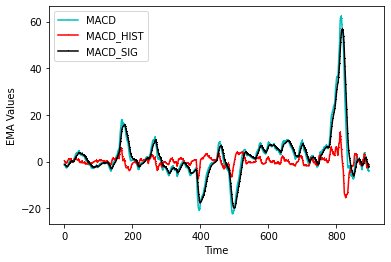

In [208]:
plt.plot(final_target_df['MACD'], ',-c')
plt.plot(final_target_df['MACD_HIST'], ',-r')
plt.plot(final_target_df['MACD_SIG'], ',-k')
plt.xlabel('Time')
plt.ylabel('EMA Values')
plt.legend(['MACD', 'MACD_HIST', 'MACD_SIG'])

Text(0.5, 1.0, 'Stochastic %K vs Time')

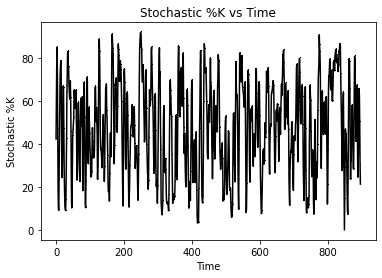

In [209]:
plt.plot(final_target_df['STOCH_K'], ',-k')
plt.xlabel('Time')
plt.ylabel('Stochastic %K')
plt.title('Stochastic %K vs Time')

Text(0.5, 1.0, 'Stochastic %D vs Time')

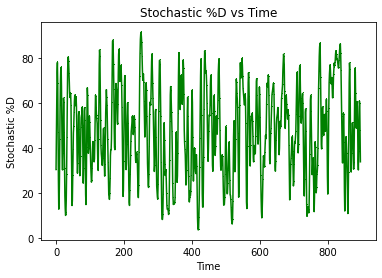

In [210]:
plt.plot(final_target_df['STOCH_D'], ',-g')
plt.xlabel('Time')
plt.ylabel('Stochastic %D')
plt.title('Stochastic %D vs Time')

Text(0.5, 1.0, 'RSI vs Time')

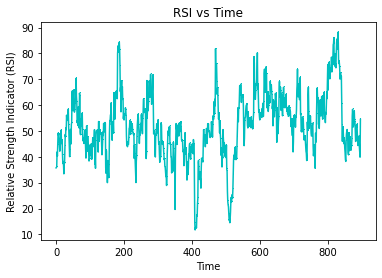

In [211]:
plt.plot(final_target_df['RSI'], ',-c')
plt.xlabel('Time')
plt.ylabel('Relative Strength Indicator (RSI)')
plt.title('RSI vs Time')

Text(0.5, 1.0, 'CCI vs Time')

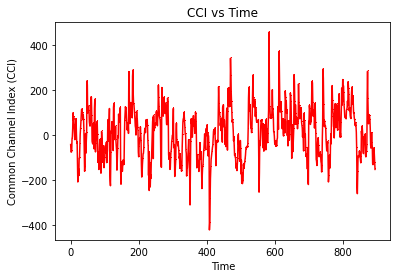

In [212]:
plt.plot(final_target_df['CCI'], ',-r')
plt.xlabel('Time')
plt.ylabel('Common Channel Index (CCI)')
plt.title('CCI vs Time')

Text(0.5, 1.0, 'Moving Average Envelope T=30 days')

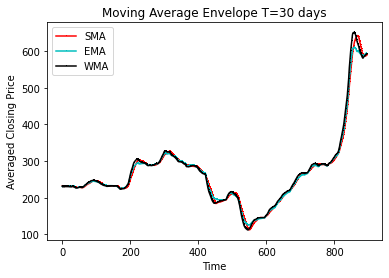

In [213]:
plt.plot(final_target_df['SMA'], ',-r')
plt.plot(final_target_df['EMA'], ',-c')
plt.plot(final_target_df['WMA'], ',-k')
plt.xlabel('Time')
plt.ylabel('Averaged Closing Price')
plt.legend(['SMA', 'EMA', 'WMA'])
plt.title('Moving Average Envelope T=30 days')

Text(0.5, 1.0, 'Momentum vs Time')

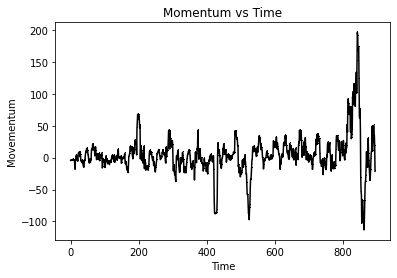

In [214]:
plt.plot(final_target_df['MOM'], ',-k')
plt.xlabel('Time')
plt.ylabel('Movementum')
plt.title('Momentum vs Time')

Text(0.5, 1.0, 'Price vs Time')

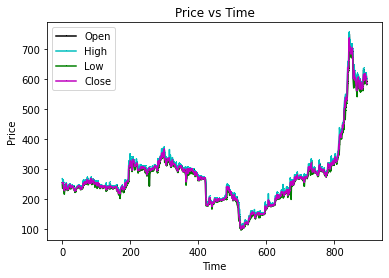

In [215]:
plt.plot(final_target_df['Open'], ',-k')
plt.plot(final_target_df['High'], ',-c')
plt.plot(final_target_df['Low'], ',-g')
plt.plot(final_target_df['Close'], ',-m')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.title('Price vs Time')

#### Correlation Target

In [216]:
# from sklearn import preprocessing

In [217]:
# min_max = preprocessing.MinMaxScaler()
# scaled_final_target_df = min_max.fit_transform(final_target_df.iloc[:, 1:3].to_numpy())

In [218]:
# scaled_final_target_df = pd.DataFrame(scaled_final_target_df, columns=final_target_df.iloc[:, 1:3].columns)

In [219]:
# scaled_final_target_df.head()

In [220]:
# %matplotlib qt
# sns.heatmap(scaled_final_target_df)

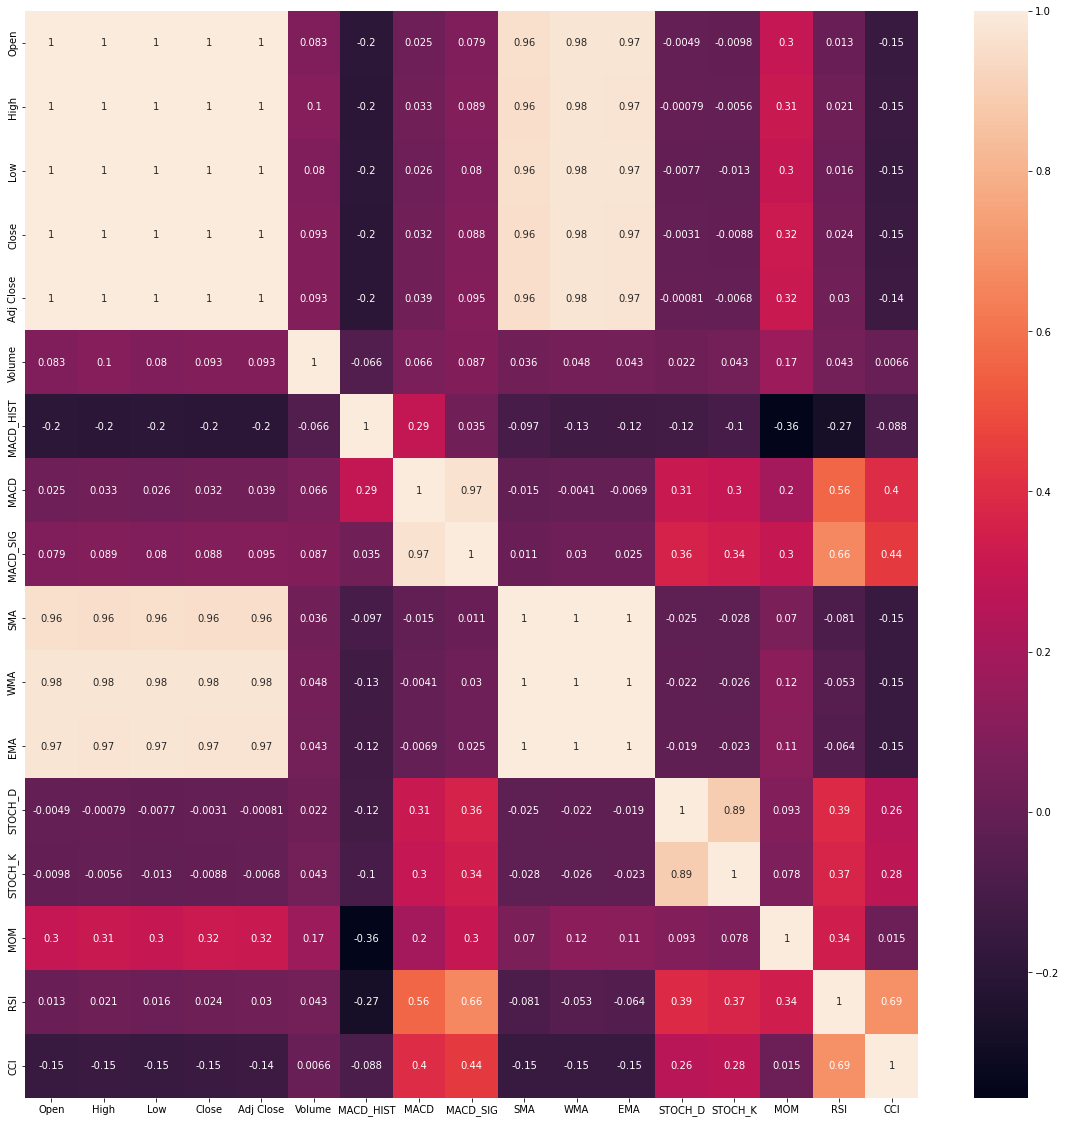

In [221]:
target_corr = final_target_df.corr()
top_target_corr_features = target_corr.index
plt.figure(figsize=(20,20))
target_heatmap = sns.heatmap(final_target_df[top_target_corr_features].corr(),annot=True)

#### Selecting Features Target

**Selecting:** Close, Volume, EMA, MACD_HIST, MACD_SIG, MACD, STOCH_D, STOCH_K, RSI and CCI  
**Removing:** Open, High, Low, SMA, WMA

In [222]:
#final_target_df.drop(['Open', 'High', 'Low', 'SMA', 'WMA', 'Close'], axis=1, inplace=True)

In [223]:
#final_target_df.to_csv('./data/features_target.csv')